In [367]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score

In [368]:
#Load the data into a dataframe
data = pd.read_csv('FinalData.csv')

In [369]:
#EDA(Exploratory Data Analysis)

In [370]:
#Summary Statistics
summary = data.describe()
#Data Types & Missing Values
data.info()
missing_values = data.isnull().sum()
missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        21 non-null     object 
 1   GDP                         21 non-null     float64
 2   CPI                         21 non-null     float64
 3   HPI                         21 non-null     float64
 4   ECI                         21 non-null     float64
 5   UNRATE                      21 non-null     float64
 6   Working Age Distribution    21 non-null     float64
 7   Income Distribution         21 non-null     int64  
 8   Population Level            21 non-null     int64  
 9   FED                         21 non-null     float64
 10  Mortgage                    21 non-null     float64
 11  Homeownership Rate          21 non-null     float64
 12  Rental Vacancy Rate         21 non-null     float64
 13  Housing Inventory Estimate  21 non-nu

Date                          0
GDP                           0
CPI                           0
HPI                           0
ECI                           0
UNRATE                        0
Working Age Distribution      0
Income Distribution           0
Population Level              0
FED                           0
Mortgage                      0
Homeownership Rate            0
Rental Vacancy Rate           0
Housing Inventory Estimate    0
dtype: int64

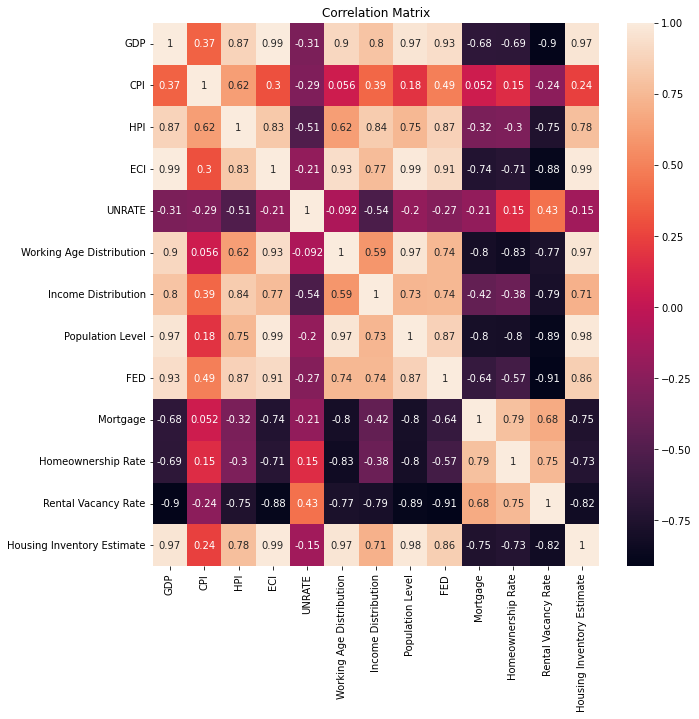

In [371]:
#Correlation Analysis
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [373]:
#Correlation Analysis for feature selection

#calculate Correlation Matrix
correlation_matrix = data.corr(numeric_only=True)

#Get the correlation of the features with respect to the target variable(Housing Price Index HPI)
target_correlation = correlation_matrix['HPI']

#Sort the correlation values in descending order
target_correlation_sorted = target_correlation.abs().sort_values(ascending=False)

#Print sorted correlation values
print(target_correlation_sorted)

HPI                           1.000000
GDP                           0.873220
FED                           0.869696
Income Distribution           0.836804
ECI                           0.825638
Housing Inventory Estimate    0.778069
Rental Vacancy Rate           0.752992
Population Level              0.745547
CPI                           0.624177
Working Age Distribution      0.622487
UNRATE                        0.512042
Mortgage                      0.315767
Homeownership Rate            0.301625
Name: HPI, dtype: float64


In [374]:
#Split the data into feature(x) and target(y) variables
x = data[['GDP','CPI','FED','Income Distribution','ECI','Housing Inventory Estimate','Rental Vacancy Rate','Population Level','CPI']] #feature variables
y = data['HPI'] #target variable

#Split the data into training and testing sets with 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1 , random_state=1) 


In [375]:
#Model building using Linear Regression

#Model training
model1 = LinearRegression()
model1.fit(x_train, y_train)

#Model testing

#Predict the target variable using the test data
y_pred = model1.predict(x_test)

#Evaluate the model using R2 Score and Mean Squared Error
r2_score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R2 Score: ', r2_score)
print('Mean Squared Error: ', mse)

#Accuracy of the model
accuracy = model1.score(x_test, y_test)
print('Accuracy: ', accuracy*100, '%')

R2 Score:  0.8892863562863811
Mean Squared Error:  47.64049121790354
Accuracy:  88.9286356286381 %


In [376]:
#Cross Validation for Linear Regression

# Choose the number of folds for cross-validation
num_folds = 5

# Initialize K-Fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation for the Linear Regression model
linear_regression_scores = cross_val_score(model1, x, y, cv=kf, scoring='r2')

# Calculate the mean and standard deviation of R-squared for the Linear Regression model
linear_r2_mean = linear_regression_scores.mean()
linear_r2_std = linear_regression_scores.std()

# Print the cross-validation results for Linear Regression
print("Linear Regression Mean R-squared: ", linear_r2_mean)
print("Linear Regression Std R-squared: ", linear_r2_std)


Linear Regression Mean R-squared:  0.639074876684388
Linear Regression Std R-squared:  0.40552036530842744


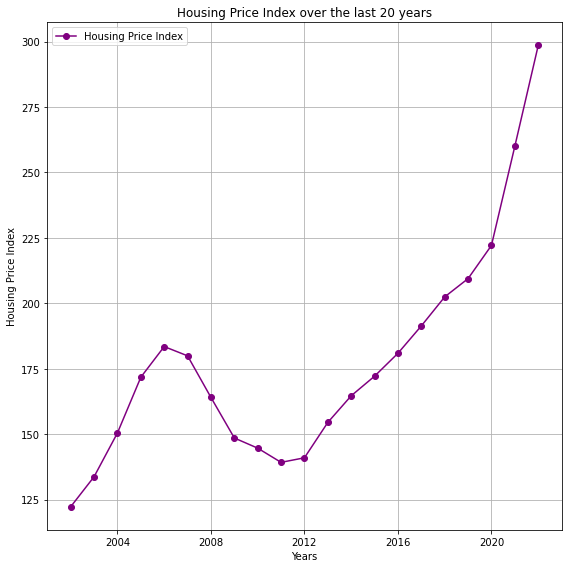

In [377]:
#Visualize the model

#Housing Price Index HPI 
#Creating a Line Chart

data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year

plt.figure(figsize=(8,8))
plt.plot(data['Date'], data['HPI'], label='Housing Price Index', color='purple', marker='o', linestyle='solid')

#Adding Title and Labels
plt.title('Housing Price Index over the last 20 years')
plt.xlabel('Years')
plt.ylabel('Housing Price Index')

#Adding Legend
plt.legend(loc='upper left')

#Display in grid
plt.grid(True)

#Display the plot
plt.tight_layout()
plt.show()


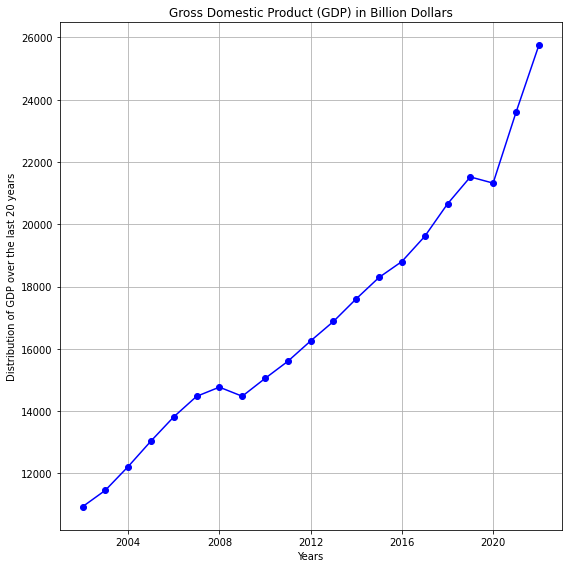

In [378]:
#Economic Indicators

#GDP
plt.figure(figsize=(8,8))
plt.plot(data['Date'], data['GDP'], label='GDP', color='blue', marker='o', linestyle='-')

#Adding Title and Labels
plt.title('Gross Domestic Product (GDP) in Billion Dollars')
plt.xlabel('Years')
plt.ylabel('Distribution of GDP over the last 20 years')

#Display in grid
plt.grid(True)

#Display the plot
plt.tight_layout()
plt.show()

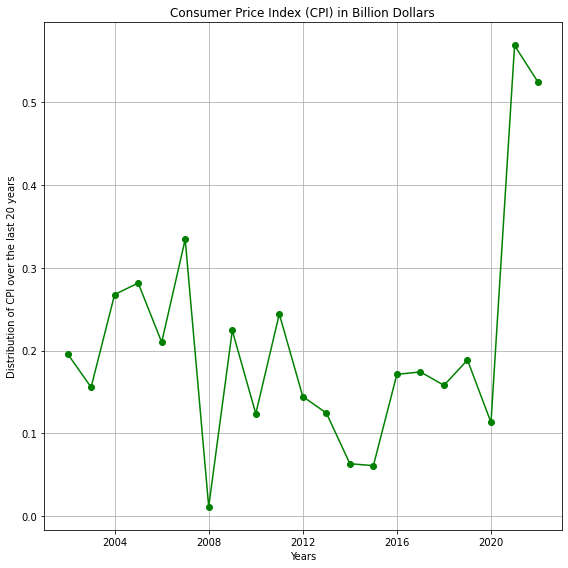

In [379]:
#CPI
plt.figure(figsize=(8,8))
plt.plot(data['Date'], data['CPI'], label='CPI', color='green', marker='o', linestyle='-')

#Adding Title and Labels
plt.title('Consumer Price Index (CPI) in Billion Dollars')
plt.xlabel('Years')
plt.ylabel('Distribution of CPI over the last 20 years')

#Display in grid
plt.grid(True)

#Display the plot
plt.tight_layout()
plt.show()

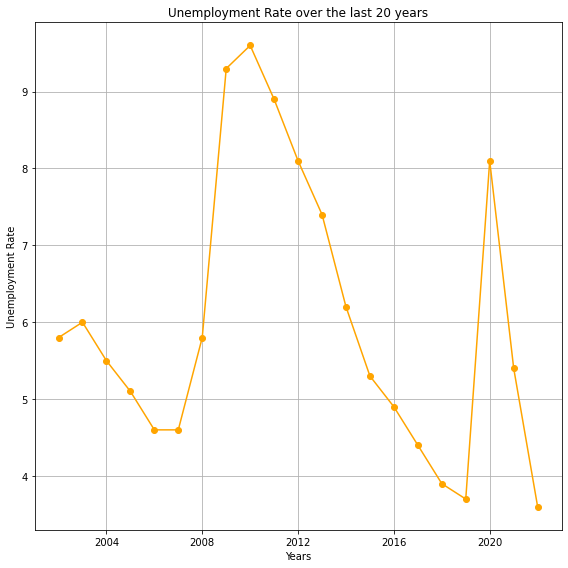

In [380]:
#Unemployment Rate
plt.figure(figsize=(8,8))
plt.plot(data['Date'], data['UNRATE'], label='UnEmployment Rate', color='Orange', marker='o', linestyle='-')

#Adding Title and Labels
plt.title('Unemployment Rate over the last 20 years')
plt.xlabel('Years')
plt.ylabel('Unemployment Rate')

#Display in grid
plt.grid(True)

#Display the plot
plt.tight_layout()
plt.show()

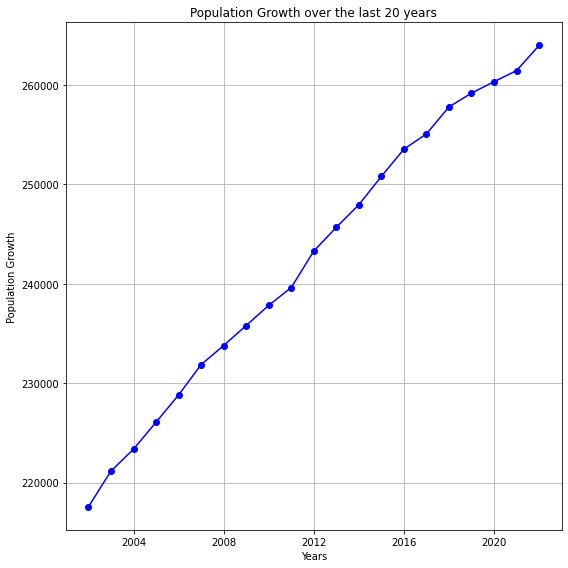

In [381]:
#Demographic Indicators

#Population Growth
plt.figure(figsize=(8,8))
plt.plot(data['Date'], data['Population Level'], label='Population Growth', color='blue', marker='o', linestyle='-')

#Adding Title and Labels
plt.title('Population Growth over the last 20 years')
plt.xlabel('Years')
plt.ylabel('Population Growth')

#Display in grid
plt.grid(True)

#Display the plot
plt.tight_layout()
plt.show()

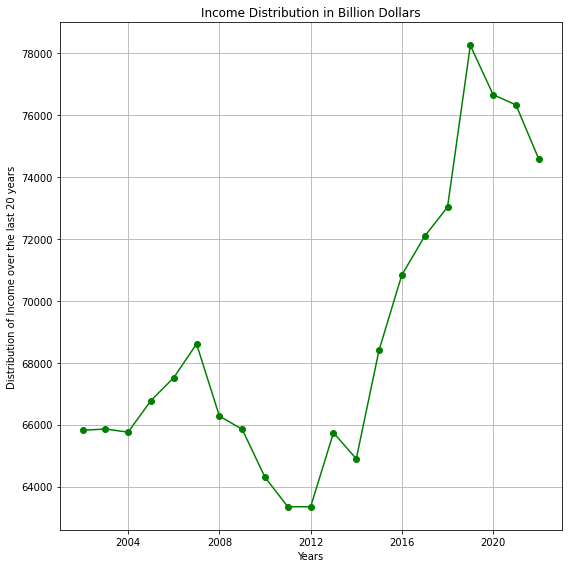

In [382]:
#Income Distribution
plt.figure(figsize=(8,8))
plt.plot(data['Date'], data['Income Distribution'], label='Income', color='green', marker='o', linestyle='-')

#Adding Title and Labels
plt.title('Income Distribution in Billion Dollars')
plt.xlabel('Years')
plt.ylabel('Distribution of Income over the last 20 years')

#Display in grid
plt.grid(True)

#Display the plot
plt.tight_layout()
plt.show()

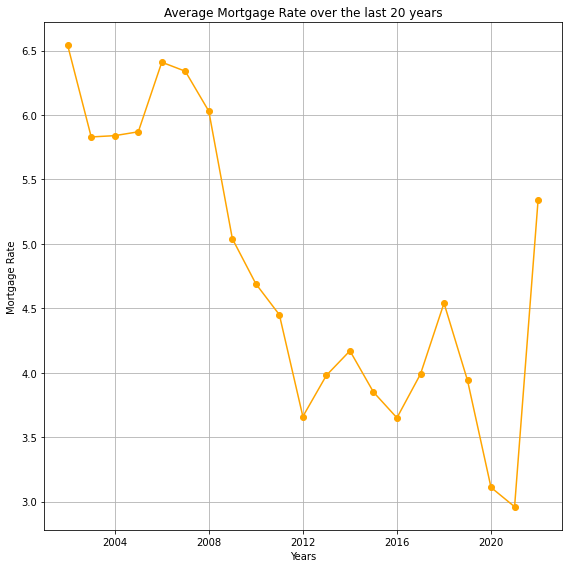

In [383]:
#Mortgage Rate
plt.figure(figsize=(8,8))
plt.plot(data['Date'], data['Mortgage'], label='Mortgage', color='orange', marker='o', linestyle='-')

#Adding Title and Labels
plt.title('Average Mortgage Rate over the last 20 years')
plt.xlabel('Years')
plt.ylabel('Mortgage Rate')

#Display in grid
plt.grid(True)

#Display the plot
plt.tight_layout()
plt.show()

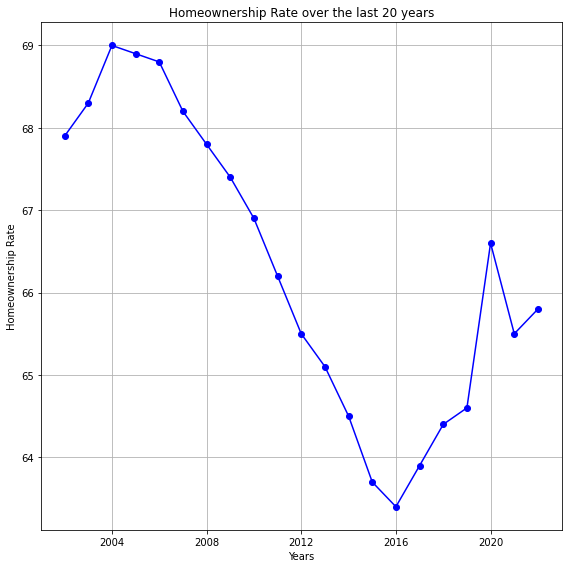

In [384]:
#Housing Market Indicators

#Homeownership Rate
plt.figure(figsize=(8,8))
plt.plot(data['Date'], data['Homeownership Rate'], label='Homeownership', color='blue', marker='o', linestyle='-')

#Adding Title and Labels
plt.title('Homeownership Rate over the last 20 years')
plt.xlabel('Years')
plt.ylabel('Homeownership Rate')

#Display in grid
plt.grid(True)

#Display the plot
plt.tight_layout()
plt.show()

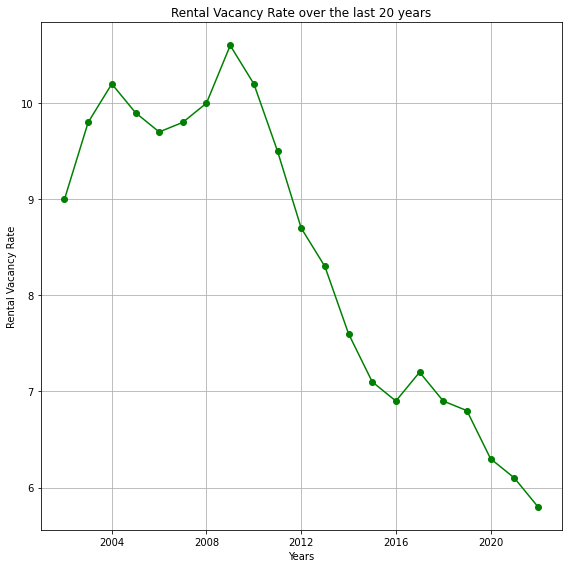

In [385]:
#Rental Vacancy Rate
plt.figure(figsize=(8,8))
plt.plot(data['Date'], data['Rental Vacancy Rate'], label='Rental Vacancy Rate', color='green', marker='o', linestyle='-')

#Adding Title and Labels
plt.title('Rental Vacancy Rate over the last 20 years')
plt.xlabel('Years')
plt.ylabel('Rental Vacancy Rate')

#Display in grid
plt.grid(True)

#Display the plot
plt.tight_layout()
plt.show()

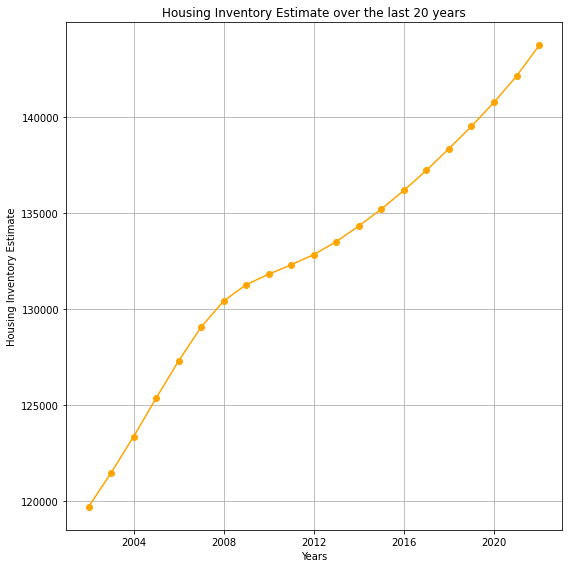

In [386]:
#Housing Inventory Estimate
plt.figure(figsize=(8,8))
plt.plot(data['Date'], data['Housing Inventory Estimate'], label='Housing Inventory Estimate', color='orange', marker='o', linestyle='-')

#Adding Title and Labels
plt.title('Housing Inventory Estimate over the last 20 years')
plt.xlabel('Years')
plt.ylabel('Housing Inventory Estimate')

#Display in grid
plt.grid(True)

#Display the plot
plt.tight_layout()
plt.show()